# <span style = 'color:red'>Proyecto del curso de Estadística Descriptiva</span>

En este documento se realizará el análisis de una base de datos usando los elementos aprendidos en el curso de Estadística Descriptiva de Platzi. Esta base de datos contiene información relacionada con la velocidad y los tiempos de viaje en la ciudad de Medellín, y se puede acceder a la fuente haciendo clic [aquí](http://medata.gov.co/dataset/velocidad-y-tiempo-de-viaje-gt).

In [64]:
# Lectura de paquetes importantes ===============

import pandas as pd
import numpy as np
from sklearn import preprocessing, linear_model
from matplotlib import pyplot as plt
import janitor
import seaborn as sns
import locale
locale.setlocale(locale.LC_ALL, 'es_ES.utf8')

'es_ES.utf8'

# Lectura y revisión de los datos

Se va a comenzar con la lectura y revisión de los datos que han sido obtenidos de MeData, la fuente de datos públicos del Distrito de Medellín.

In [80]:
# Lectura de los datos
direccion = '../Datos/velocidad_y_tiempo_de_viaje_gt.csv'
datos = pd.read_csv(direccion, delimiter = ';', decimal = ".")

C:\Users\lenovo\AppData\Local\Temp\ipykernel_58664\3532901690.py:3: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  datos = pd.read_csv(direccion, delimiter = ';', decimal = ".")


Ahora se chequeará que las primeras y las últimas columnas del marco de datos sean correctos.

In [81]:
datos = janitor.clean_names(datos)

In [82]:
pd.concat([datos.head(), datos.tail()], axis = 0)

,id,fecha_hora,tv_[s],corredor,dia,mes,ano,hora,fecha,nombre_corredor,flujo_tipo,sentido,inicio,fin,longitud_km,tv_minutos,velocidad_km_h,tv_min_km,diasem,nombre_dia
0,1210,1/02/2017 6:00,377,2,1,2,2017,6,1/02/2017,Avenida Regional,Continuo,SN,Tugo,San Juan,6.6,6.3,63.0,1.0,3,Mi�rcoles
1,1212,1/02/2017 6:00,495,4,1,2,2017,6,1/02/2017,Autopista Sur,Continuo,NS,CTI,Calle 10,6.5,8.3,47.0,1.3,3,Mi�rcoles
2,1213,1/02/2017 6:00,495,5,1,2,2017,6,1/02/2017,Autopista Norte,Continuo,NS,Solla,Punto Cero,5.3,8.3,39.0,1.6,3,Mi�rcoles
3,1214,1/02/2017 6:00,401,6,1,2,2017,6,1/02/2017,Autopista Norte,Continuo,SN,Punto Cero,Solla,5.3,6.7,48.0,1.3,3,Mi�rcoles
4,1215,1/02/2017 6:00,693,7,1,2,2017,6,1/02/2017,Avenida 80,Interrumpido,NS,Calle 65,Calle 30,5.1,11.6,26.0,2.3,3,Mi�rcoles
682497,1805102,15/12/2020 20:00,439,22,15,12,2020,20,15/12/2020,Avenida San Juan,Interrumpido,EW,Avenida Regional,Avenida 80,2.5,7.3,20.5,2.9,2,Martes
682498,1805103,15/12/2020 20:00,315,23,15,12,2020,20,15/12/2020,Avenida Ferrocarril,Interrumpido,NS,Barranquilla,San Juan,2.3,5.3,26.3,2.3,2,Martes
682499,1805104,15/12/2020 20:00,463,24,15,12,2020,20,15/12/2020,Avenida Ferrocarril,Interrumpido,SN,San Juan,Barranquilla,2.3,7.7,17.9,3.4,2,Martes
682500,1805105,15/12/2020 20:00,361,25,15,12,2020,20,15/12/2020,Avenida Oriental,Interrumpido,SN,San Juan,Villanueva,1.6,6.0,16.0,3.8,2,Martes
682501,1805106,15/12/2020 20:00,282,26,15,12,2020,20,15/12/2020,Avenida Oriental,Interrumpido,NS,Villanueva,San Juan,1.6,4.7,20.4,2.9,2,Martes


Como se puede observar, no parece haber un traspase de columnas. Ahora, se revisará las dimensiones del marco de datos:

In [83]:
datos.shape

(682502, 20)

Como se puede observar, se cuenta con $682,502$ observaciones y con $20$ características. Luego, se chequeará el formato de dato de cada una de las características:

In [84]:
datos.dtypes

id                  object
fecha_hora          object
tv_[s]               int64
corredor             int64
dia                  int64
mes                  int64
ano                  int64
hora                 int64
fecha               object
nombre_corredor     object
flujo_tipo          object
sentido             object
inicio              object
fin                 object
longitud_km        float64
tv_minutos         float64
velocidad_km_h     float64
tv_min_km          float64
diasem               int64
nombre_dia          object
dtype: object

Como se puede observar, la mayoría de los datos están en un formato adecuado según la documentación de este marco de datos (disponible en el enlace dejado al inicio de este cuadernillo). No obstante, las fechas tienen un formato tipo `object`, por lo que vale hacer la corrección del tipo de dato de las columnas `fecha_hora`, como la columna `fecha` simplemente replica a `fecha_hora` pero sin la hora, se arrojará del marco de datos para no tener columnas redundantes.

Asimismo, se puede usar la columna `id` como el índice de cada una de las columnas.

In [48]:
# Columna de id como índice de cada una de las filas
datos.set_index('id', inplace = True)

In [85]:
# Columna 'fecha_hora' en formato datetime
datos.fecha_hora = pd.to_datetime(datos.fecha_hora, errors = 'ignore')

In [86]:
# Eliminación de la columna fecha
datos.drop(['fecha'], axis = 1, inplace = True)

Ahora, como se pudo observar en la revisión de las primeras y últimas cinco columnas del marco de datos, los días de la semana están siendo codificiados de forma inadecuada (esto a pesar de usar varias opciones para el `encoding`), veámoslo con mayor claridad enseguida:

In [87]:
datos.nombre_dia.unique()

array(['Mi�rcoles', 'Jueves', 'Viernes', 'S�bado', 'Lunes', 'Martes',
       'Domingo', 'jueves', 'mi�rcoles', 'martes'], dtype=object)

Nótese el problema con los días 'Miércoles' y 'Sábado', además que en algunos casos se usa mayúscula inicial y en otros no. Para poder solucionar esta problemática, y aprovechando que se conoce el día del registro, se obtendrá el día de este registro.

In [88]:
# Eliminación de la columna nombre_dia
datos.drop(['nombre_dia'], axis = 1, inplace = True)

In [89]:
# Obtención del día
datos['nombre_dia'] = datos['fecha_hora'].dt.day_name()

In [90]:
datos.nombre_dia.unique()

array(['Monday', 'Thursday', 'Sunday', 'Friday', 'Wednesday', 'Saturday',
       'Tuesday'], dtype=object)

Como se puede, observar, los días de la semana ahora tienen un formato estándar, aunque están en inglés. Por último, se corregirá el tipo de dato de la variable `corredor`, que si bien la documentación indica que es de tipo numérico, teniendo en cuenta que esta variable se asocia más con un identificador de los diferentes corredores de la ciudad, es más apropiado tener esta variable como categórica.

In [91]:
datos['corredor'] = datos['corredor'].astype(object)

 Por último, la variable que tiene el tiempo de viaje en segundos, `tv_[s]`, será transformada para que sus unidades estén dadas en minutos, puesto que esta es una escala más comprensible para la mayoría del público.

In [92]:
datos['tv_[s]'] = datos['tv_[s]'] / 60
datos.rename(columns = {'tv_[s]': 'tiempo_viaje'}, inplace = True)

In [93]:
datos.head()

,id,fecha_hora,tiempo_viaje,corredor,dia,mes,ano,hora,nombre_corredor,flujo_tipo,sentido,inicio,fin,longitud_km,tv_minutos,velocidad_km_h,tv_min_km,diasem,nombre_dia
0,1210,2017-01-02 06:00:00,6.283333,2,1,2,2017,6,Avenida Regional,Continuo,SN,Tugo,San Juan,6.6,6.3,63.0,1.0,3,Monday
1,1212,2017-01-02 06:00:00,8.250000,4,1,2,2017,6,Autopista Sur,Continuo,NS,CTI,Calle 10,6.5,8.3,47.0,1.3,3,Monday
2,1213,2017-01-02 06:00:00,8.250000,5,1,2,2017,6,Autopista Norte,Continuo,NS,Solla,Punto Cero,5.3,8.3,39.0,1.6,3,Monday
3,1214,2017-01-02 06:00:00,6.683333,6,1,2,2017,6,Autopista Norte,Continuo,SN,Punto Cero,Solla,5.3,6.7,48.0,1.3,3,Monday
4,1215,2017-01-02 06:00:00,11.550000,7,1,2,2017,6,Avenida 80,Interrumpido,NS,Calle 65,Calle 30,5.1,11.6,26.0,2.3,3,Monday


## <span style = 'color: red'>Resúmenes numéricos y gráficos</span>

Habiendo realizado algunas adecuaciones básicas al marco de datos, se procederá con la realización de algunos resúmenes numéricos a este marco de datos. Comencemos entonces con las variables cuantitativas:

In [120]:
round(datos[['tiempo_viaje', 'velocidad_km_h']].describe(), 2)

,tiempo_viaje,velocidad_km_h
count,682502.00,682502.00
mean,8.82,29.49
std,3.69,13.47
min,3.17,3.00
25%,6.30,19.00
50%,7.75,26.00
75%,10.38,38.00
max,76.47,79.20


Como se puede observar, el tiempo promedio de viaje es de ocho minutos, siendo la desviación estándar de 3.68 minutos, con un mínimo de 3.17 minutos. Igualmente, la velocidad promedio por la que se transita por las vías estudiadas en este marco de datos es de 29.49 kilómetros, con una desviación estándar de 13.47 kilómetros.

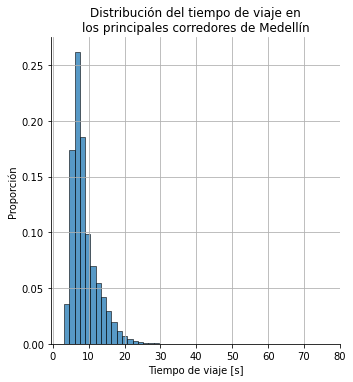

In [121]:
sns.displot(data = datos,
            x = 'tiempo_viaje',
            kind = 'hist',
            stat = 'probability',
            bins = 50)
plt.title('Distribución del tiempo de viaje en\nlos principales corredores de Medellín')
plt.xlabel('Tiempo de viaje [s]')
plt.ylabel('Proporción')
plt.grid()
plt.show()

Se puede observar que la distribución es sesgada positiva, y que una parte significativa de los viajes que ocurren en Medellín se dan bajo los diez minutos. Ahora, si estudiamos un gráfico semejante pero discriminado según el corredor:

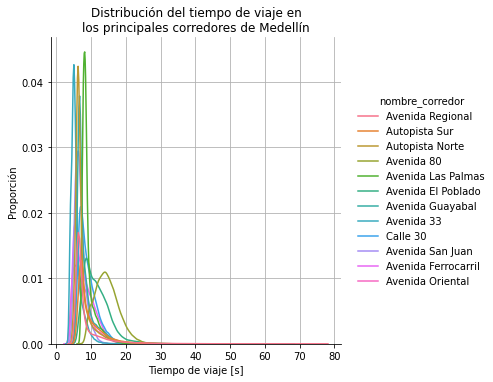

In [122]:
sns.displot(data = datos,
            x = 'tiempo_viaje',
            hue = 'nombre_corredor',
            kind = 'kde')
plt.title('Distribución del tiempo de viaje en\nlos principales corredores de Medellín')
plt.xlabel('Tiempo de viaje [s]')
plt.ylabel('Proporción')
plt.grid()
plt.show()

Se puede observar que el corredor donde los viajes toman más tiempo es el de la avenida 80.

# <span style = 'color: red'>Procesamiento de datos según su tipo</span>

## Variables cuantitativas

Se va a estandarizar el tipo de datos de las variables `tiempo_viaje` y `velocidad_km_h`.

In [130]:
# Estandarizador
estandarizador = preprocessing.StandardScaler()

# Estandarización de las variables de interés
estandarizado = estandarizador.fit_transform(datos[['tiempo_viaje', 'velocidad_km_h']])
estandarizado = pd.DataFrame(estandarizado, columns = ['tiempo_viaje', 'velocidad_km_h'])

In [131]:
estandarizado

,tiempo_viaje,velocidad_km_h
0,-0.686915,2.488020
1,-0.153481,1.300014
2,-0.153481,0.706011
3,-0.578420,1.374264
4,0.741605,-0.259244
...,...,...
682497,-0.406636,-0.667622
682498,-0.967195,-0.236969
682499,-0.298141,-0.860673
682500,-0.759246,-1.001748


Si estudiamos nuevamente la distribución del tiempo de viaje:

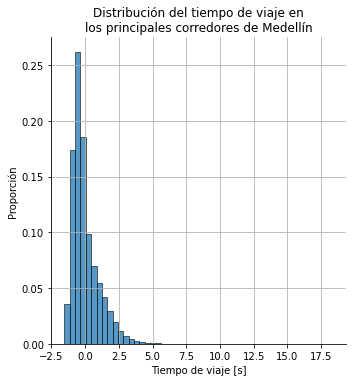

In [132]:
sns.displot(data = estandarizado,
            x = 'tiempo_viaje',
            kind = 'hist',
            stat = 'probability',
            bins = 50)
plt.title('Distribución del tiempo de viaje en\nlos principales corredores de Medellín')
plt.xlabel('Tiempo de viaje [s]')
plt.ylabel('Proporción')
plt.grid()
plt.show()

In [134]:
estandarizado.describe()

,tiempo_viaje,velocidad_km_h
count,6.825020e+05,6.825020e+05
mean,-2.190443e-16,3.609651e-16
std,1.000001e+00,1.000001e+00
min,-1.532274e+00,-1.967003e+00
25%,-6.823949e-01,-7.789971e-01
50%,-2.890996e-01,-2.592443e-01
75%,4.251608e-01,6.317604e-01
max,1.834948e+01,3.690877e+00


Si se considera una transformación no lineal:

In [137]:
# Marco de datos con transformaciones no lineales:
nl = pd.DataFrame()
nl['tiempo_viaje'] = datos.tiempo_viaje.apply(lambda x: np.tanh(x/5000))
nl['velocidad_km_h'] = datos.velocidad_km_h.apply(lambda x: np.tanh(x/500))

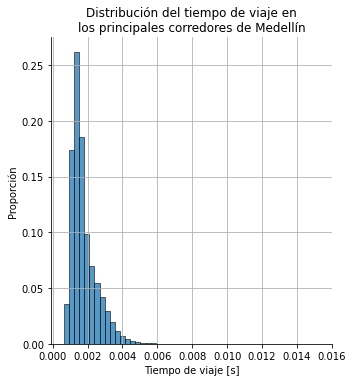

In [138]:
sns.displot(data = nl,
            x = 'tiempo_viaje',
            kind = 'hist',
            stat = 'probability',
            bins = 50)
plt.title('Distribución del tiempo de viaje en\nlos principales corredores de Medellín')
plt.xlabel('Tiempo de viaje [s]')
plt.ylabel('Proporción')
plt.grid()
plt.show()

## Variable cualitativa

Se considerará el caso de la variable relacionada con el corredor: `nombre_corredor`

In [150]:
# Codificador One-Hot
one_hot = preprocessing.OneHotEncoder(handle_unknown = 'ignore')

# Codificación
dummy = one_hot.fit_transform(datos[['nombre_corredor']]).toarray()

In [151]:
dummy = pd.DataFrame(dummy, columns = one_hot.get_feature_names_out().tolist())

In [152]:
dummy.head()

,nombre_corredor_Autopista Norte,nombre_corredor_Autopista Sur,nombre_corredor_Avenida 33,nombre_corredor_Avenida 80,nombre_corredor_Avenida El Poblado,nombre_corredor_Avenida Ferrocarril,nombre_corredor_Avenida Guayabal,nombre_corredor_Avenida Las Palmas,nombre_corredor_Avenida Oriental,nombre_corredor_Avenida Regional,nombre_corredor_Avenida San Juan,nombre_corredor_Calle 30
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
